In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("./textos_categorizados_com_categoria(1).csv")
condicao = (data['categoria_id'] == 0)
data = data.drop(data[condicao].index)
data = data.drop('categoria',axis=1)
data['categoria_id'].unique()

array([2, 8, 4, 3, 1, 6, 7])

In [4]:
data['texto_extraido'].fillna('', inplace=True)
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['texto_extraido'])

In [5]:
print(tfidf.get_feature_names_out())

['00' '000' '000002' ... 'órgãos' 'único' 'útil']


In [6]:
print(tfidf_matrix[:5].toarray())

[[0.03357028 0.         0.         ... 0.         0.         0.06566469]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.0593941  0.         0.         ... 0.         0.         0.        ]]


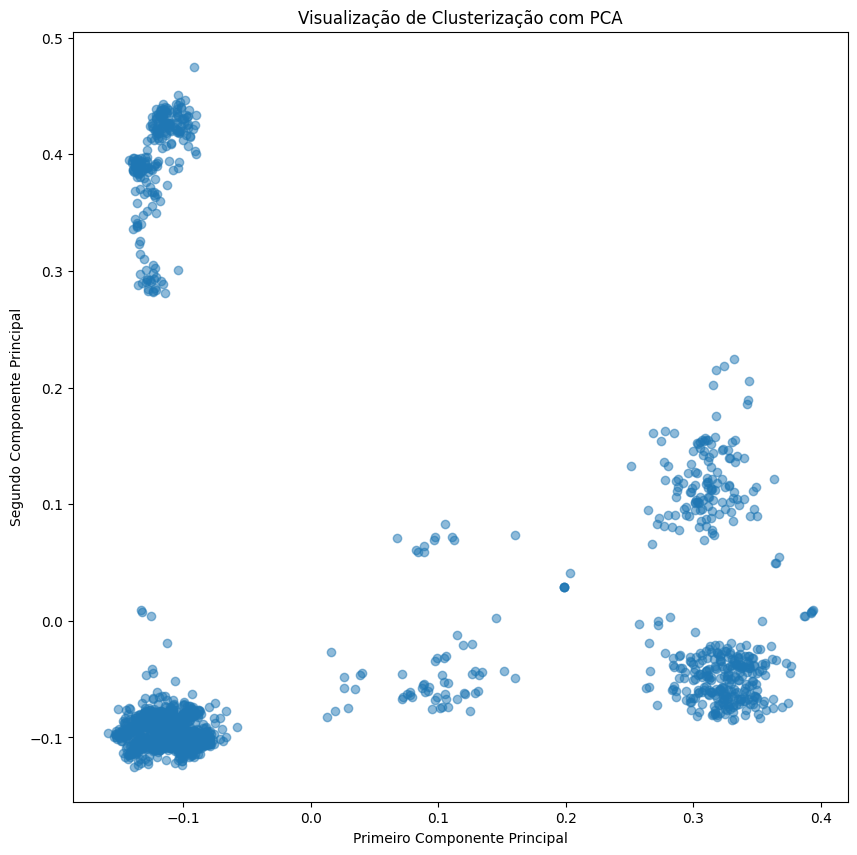

In [7]:
import matplotlib.pyplot as plt
pca = PCA(n_components=2)  # Reduzindo para 2 componentes principais (você pode ajustar o número)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())
plt.figure(figsize=(10, 10))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1] , alpha=0.5)
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualização de Clusterização com PCA')
plt.show()

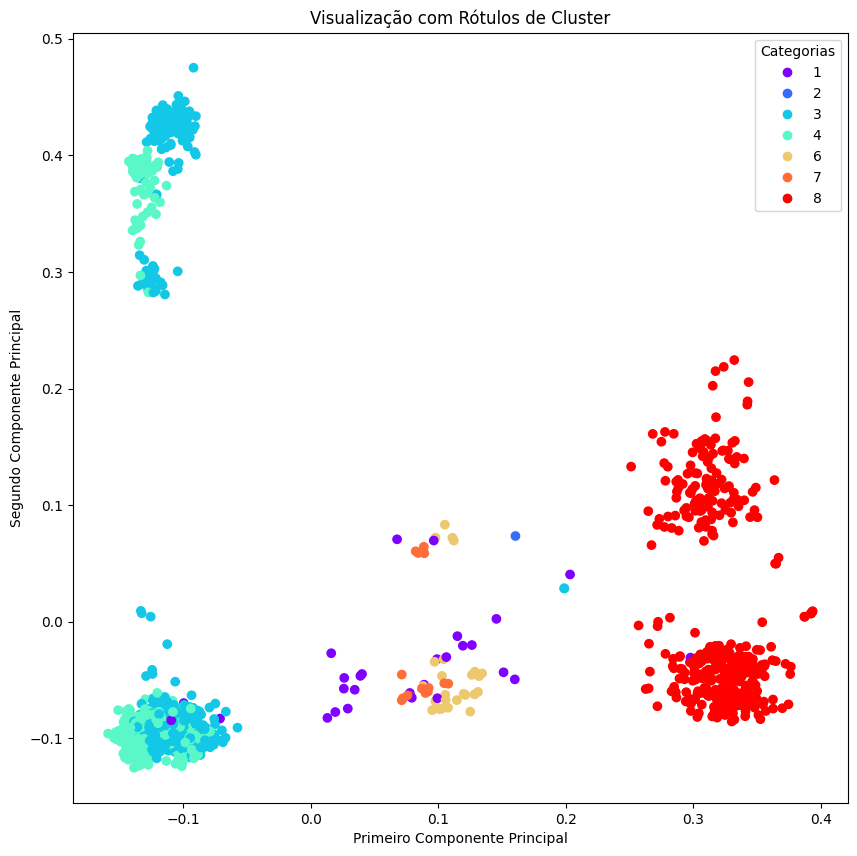

In [8]:
num_clusters = 350
categoria_codes = data['categoria_id'].astype('category')
code_to_category_mapping = dict(enumerate(categoria_codes.cat.categories))

# Codifica os rótulos
labels = data['categoria_id']
plt.figure(figsize=(10, 10))
scatter = plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=labels, cmap='rainbow')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualização com Rótulos de Cluster')
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, title='Categorias')
plt.show()

In [9]:
numero_de_categorias = data['categoria_id'].nunique()
numero_de_categorias

7

In [10]:
categorias_unicas = data['categoria_id'].unique()
categorias_unicas

array([2, 8, 4, 3, 1, 6, 7])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
X =data["texto_extraido"]  # Recursos (excluindo a coluna "categoria")
y = data['categoria_id']  # Rótulo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=0.7, random_state=42)
# X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size=0.4, random_state=42)
# X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

# X_train_30_tfidf = tfidf.fit_transform(X_train_30)
# X_train_60_tfidf = tfidf.fit_transform(X_train_60)
# X_train_90_tfidf = tfidf.fit_transform(X_train_90)

# X_test_30_tfidf = tfidf.transform(X_test_30)
# X_test_60_tfidf = tfidf.transform(X_test_60)
# X_test_90_tfidf = tfidf.transform(X_test_90)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Acurácia do modelo de regressão logistica: 96.39%
Matriz de Confusão:
[[ 2  5  0  1]
 [ 0 66  0  0]
 [ 0  0 49  0]
 [ 0  0  0 43]]
Relatório de Classificação:
              precision    recall  f1-score   support

           1       1.00      0.25      0.40         8
           3       0.93      1.00      0.96        66
           4       1.00      1.00      1.00        49
           8       0.98      1.00      0.99        43

    accuracy                           0.96       166
   macro avg       0.98      0.81      0.84       166
weighted avg       0.97      0.96      0.95       166



/home/mateus/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


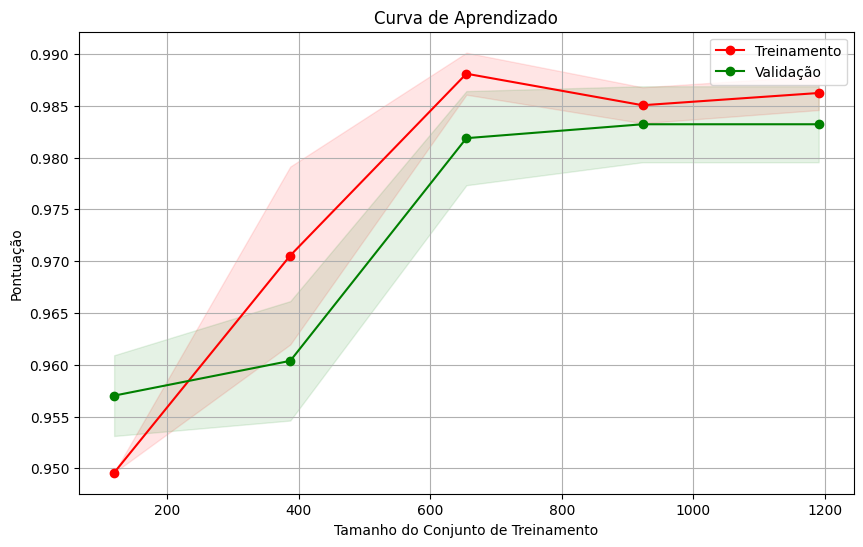

In [19]:
modelo = LogisticRegression()

# Treine o modelo com os dados de treinamento.
modelo.fit(X_train_tfidf, y_train)

# Faça previsões nos dados de teste.
previsoes = modelo.predict(X_test_tfidf)

# Avalie o desempenho do modelo com métricas, como a acurácia.
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia do modelo de regressão logistica: {:.2f}%".format(acuracia * 100))

matriz_confusao = confusion_matrix(y_test, previsoes)
relatorio_classificacao = classification_report(y_test, previsoes)

print("Matriz de Confusão:")
print(matriz_confusao)

print("Relatório de Classificação:")
print(relatorio_classificacao)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    modelo, X_train_tfidf, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Pontuação")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")

plt.legend(loc="best")
plt.show()

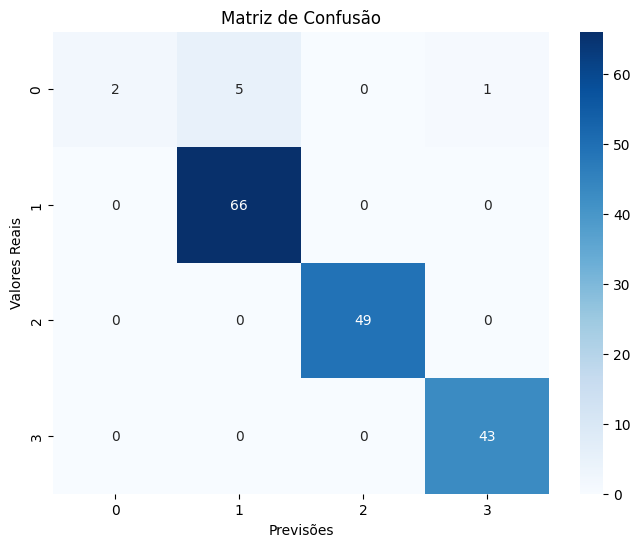

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
modelo_SGD = SGDClassifier(loss='log_loss', penalty='elasticnet', eta0=0.011)
modelo_SGD_L1 = SGDClassifier(loss='log_loss', penalty='l1')
modelo_SGD_L2 = SGDClassifier(loss='log_loss', penalty='l2')
modelo_SGD_ElasticNet = SGDClassifier(loss='log_loss', penalty='elasticnet')

# Treine o modelo com os dados de treinamento
print("todo o conjunto de treino")
modelo_SGD.fit(X_train_tfidf, y_train)
modelo_SGD_L1.fit(X_train_tfidf, y_train)
modelo_SGD_L2.fit(X_train_tfidf, y_train)
modelo_SGD_ElasticNet.fit(X_train_tfidf, y_train)

# Faça previsões nos dados de teste
previsoes_SGD = modelo_SGD.predict(X_test_tfidf)
previsoes_SGD_L1 = modelo_SGD_L1.predict(X_test_tfidf)
previsoes_SGD_L2 = modelo_SGD_L2.predict(X_test_tfidf)
previsoes_SGD_ElasticNet = modelo_SGD_ElasticNet.predict(X_test_tfidf)

# Avalie o desempenho do modelo
acuracia_SGD = accuracy_score(y_test, previsoes_SGD)
acuracia_SGD_L1 = accuracy_score(y_test, previsoes_SGD_L1)
acuracia_SGD_L2 = accuracy_score(y_test, previsoes_SGD_L2)
acuracia_SGD_ElasticNet = accuracy_score(y_test, previsoes_SGD_ElasticNet)
print("Acurácia do modelo SGD com regularização L1: {:.2f}%".format(acuracia_SGD_L1 * 100))
print("Acurácia do modelo SGD com regularização L2: {:.2f}%".format(acuracia_SGD_L2 * 100))
print("Acurácia do modelo SGD com regularização ElasticNet: {:.2f}%".format(acuracia_SGD_ElasticNet * 100))

# Calcule as métricas solicitadas
f1_macro_SGD = f1_score(y_test, previsoes_SGD, average='macro')
f1_micro_SGD = f1_score(y_test, previsoes_SGD, average='micro')
matriz_confusao_SGD = confusion_matrix(y_test, previsoes_SGD)
# relatorio_classificacao_SGD = classification_report(y_test, previsoes_SGD)
relatorio_classificacao_SGD_l1 = classification_report(y_test, previsoes_SGD_L1)
relatorio_classificacao_SGD_l2 = classification_report(y_test, previsoes_SGD_L2)
relatorio_classificacao_SGD_elasticNet = classification_report(y_test, previsoes_SGD_ElasticNet)



# print("F1 Macro do modelo SGD: {:.2f}".format(f1_macro_SGD))
# print("F1 Micro do modelo SGD: {:.2f}".format(f1_micro_SGD))
# print("Matriz de Confusão do modelo SGD:")
# print(matriz_confusao_SGD)
# print("Relatório de Classificação do modelo SGD com l1:")
# print(relatorio_classificacao_SGD_l1)
# print("Relatório de Classificação do modelo SGD l2:")
# print(relatorio_classificacao_SGD_l2)
# print("Relatório de Classificação do modelo SGD ElasticNet:")
# print(relatorio_classificacao_SGD_elasticNet)

todo o conjunto de treino
Acurácia do modelo SGD com regularização L1: 99.40%
Acurácia do modelo SGD com regularização L2: 99.40%
Acurácia do modelo SGD com regularização ElasticNet: 99.40%


/home/mateus/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


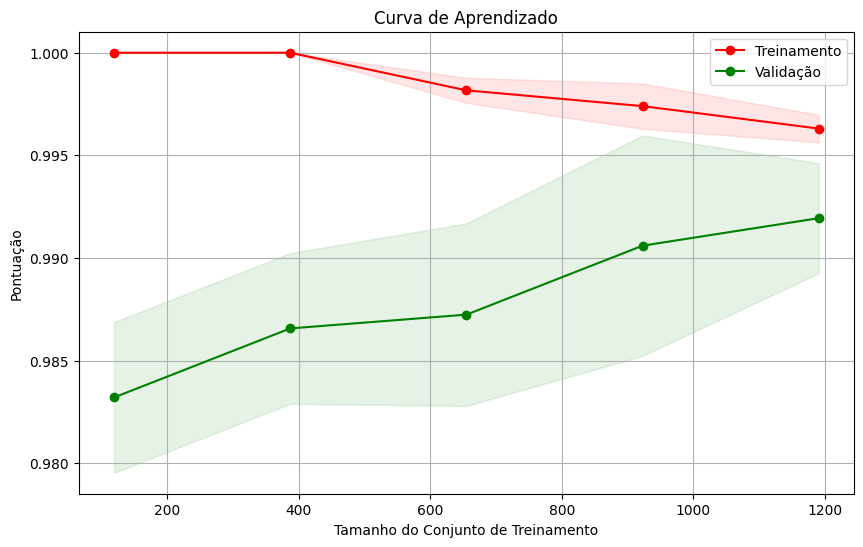

In [49]:
train_sizes, train_scores, test_scores = learning_curve(
    modelo_SGD, X_train_tfidf, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Pontuação")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")

plt.legend(loc="best")
plt.show()

In [15]:
f1_macro_SGD_L1 = f1_score(y_test, previsoes_SGD_L1, average='macro')
f1_micro_SGD_L1 = f1_score(y_test, previsoes_SGD_L1, average='micro')

print("F1 Macro do modelo SGD com regularização L1: {:.2f}".format(f1_macro_SGD_L1))
print("F1 Micro do modelo SGD com regularização L1: {:.2f}".format(f1_micro_SGD_L1))

# Calcule as métricas F1 Macro e F1 Micro para o modelo SGD com regularização L2
f1_macro_SGD_L2 = f1_score(y_test, previsoes_SGD_L2, average='macro')
f1_micro_SGD_L2 = f1_score(y_test, previsoes_SGD_L2, average='micro')

print("F1 Macro do modelo SGD com regularização L2: {:.2f}".format(f1_macro_SGD_L2))
print("F1 Micro do modelo SGD com regularização L2: {:.2f}".format(f1_micro_SGD_L2))

# Calcule as métricas F1 Macro e F1 Micro para o modelo SGD com regularização ElasticNet
f1_macro_SGD_ElasticNet = f1_score(y_test, previsoes_SGD_ElasticNet, average='macro')
f1_micro_SGD_ElasticNet = f1_score(y_test, previsoes_SGD_ElasticNet, average='micro')

print("F1 Macro do modelo SGD com regularização ElasticNet: {:.2f}".format(f1_macro_SGD_ElasticNet))
print("F1 Micro do modelo SGD com regularização ElasticNet: {:.2f}".format(f1_micro_SGD_ElasticNet))

F1 Macro do modelo SGD com regularização L1: 0.98
F1 Micro do modelo SGD com regularização L1: 0.99
F1 Macro do modelo SGD com regularização L2: 0.98
F1 Micro do modelo SGD com regularização L2: 0.99
F1 Macro do modelo SGD com regularização ElasticNet: 0.98
F1 Micro do modelo SGD com regularização ElasticNet: 0.99


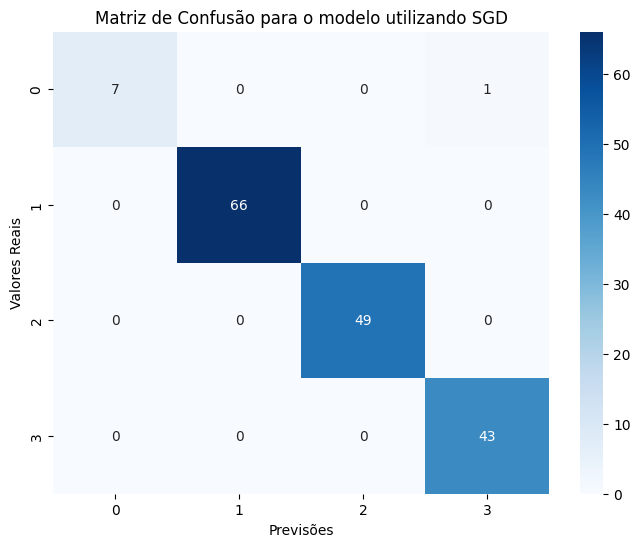

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_SGD, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão para o modelo utilizando SGD')
plt.show()

Acurácia do modelo Árvore de Decisão: 98.19%
F1 Macro do modelo Árvore de Decisão: 0.63
F1 Micro do modelo Árvore de Decisão: 0.98
Matriz de Confusão do modelo Árvore de Decisão:
[[ 5  0  0  1  2  0]
 [ 0 66  0  0  0  0]
 [ 0  0 49  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0 43]]
Relatório de Classificação do modelo Árvore de Decisão:
              precision    recall  f1-score   support

           1       1.00      0.62      0.77         8
           3       1.00      1.00      1.00        66
           4       1.00      1.00      1.00        49
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00        43

    accuracy                           0.98       166
   macro avg       0.67      0.60      0.63       166
weighted avg       1.00      0.98      0.99       166



/home/mateus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mateus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mateus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mateus/.local/lib/python3.8/site-packages/sklearn/model_se

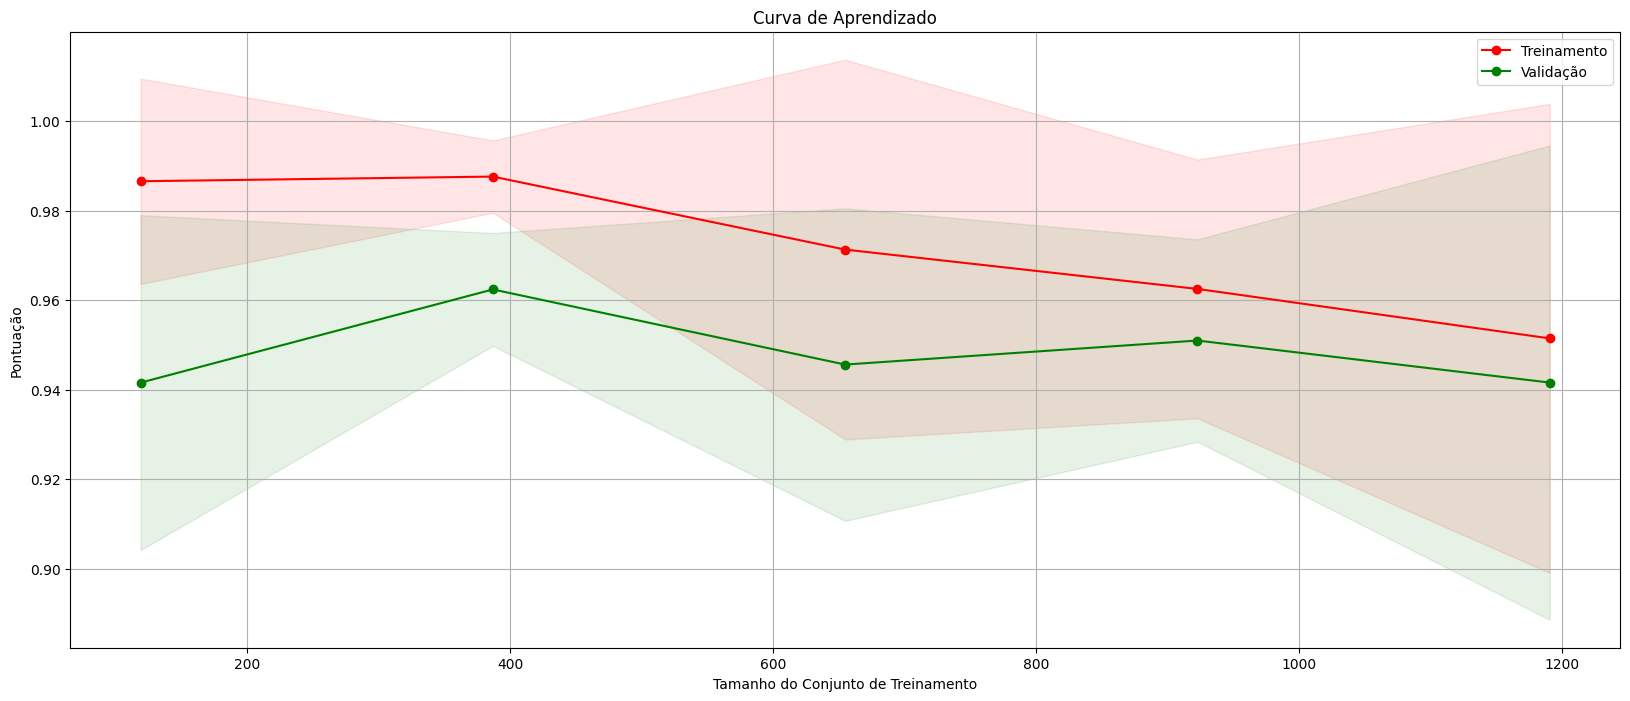

In [43]:
modelo_DT = DecisionTreeClassifier(max_depth=8, max_features=50)

# Treine o modelo com os dados de treinamento
modelo_DT.fit(X_train_tfidf, y_train)

# Faça previsões nos dados de teste
previsoes_DT = modelo_DT.predict(X_test_tfidf)

# Avalie o desempenho do modelo
acuracia_DT = accuracy_score(y_test, previsoes_DT)
print("Acurácia do modelo Árvore de Decisão: {:.2f}%".format(acuracia_DT * 100))

# Calcule as métricas solicitadas
f1_macro_DT = f1_score(y_test, previsoes_DT, average='macro')
f1_micro_DT = f1_score(y_test, previsoes_DT, average='micro')
matriz_confusao_DT = confusion_matrix(y_test, previsoes_DT)
relatorio_classificacao_DT = classification_report(y_test, previsoes_DT)

print("F1 Macro do modelo Árvore de Decisão: {:.2f}".format(f1_macro_DT))
print("F1 Micro do modelo Árvore de Decisão: {:.2f}".format(f1_micro_DT))
print("Matriz de Confusão do modelo Árvore de Decisão:")
print(matriz_confusao_DT)
print("Relatório de Classificação do modelo Árvore de Decisão:")
print(relatorio_classificacao_DT)

train_sizes, train_scores, test_scores = learning_curve(
    modelo_DT, X_train_tfidf, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(20, 8))
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Pontuação")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")

plt.legend(loc="best")
plt.show()

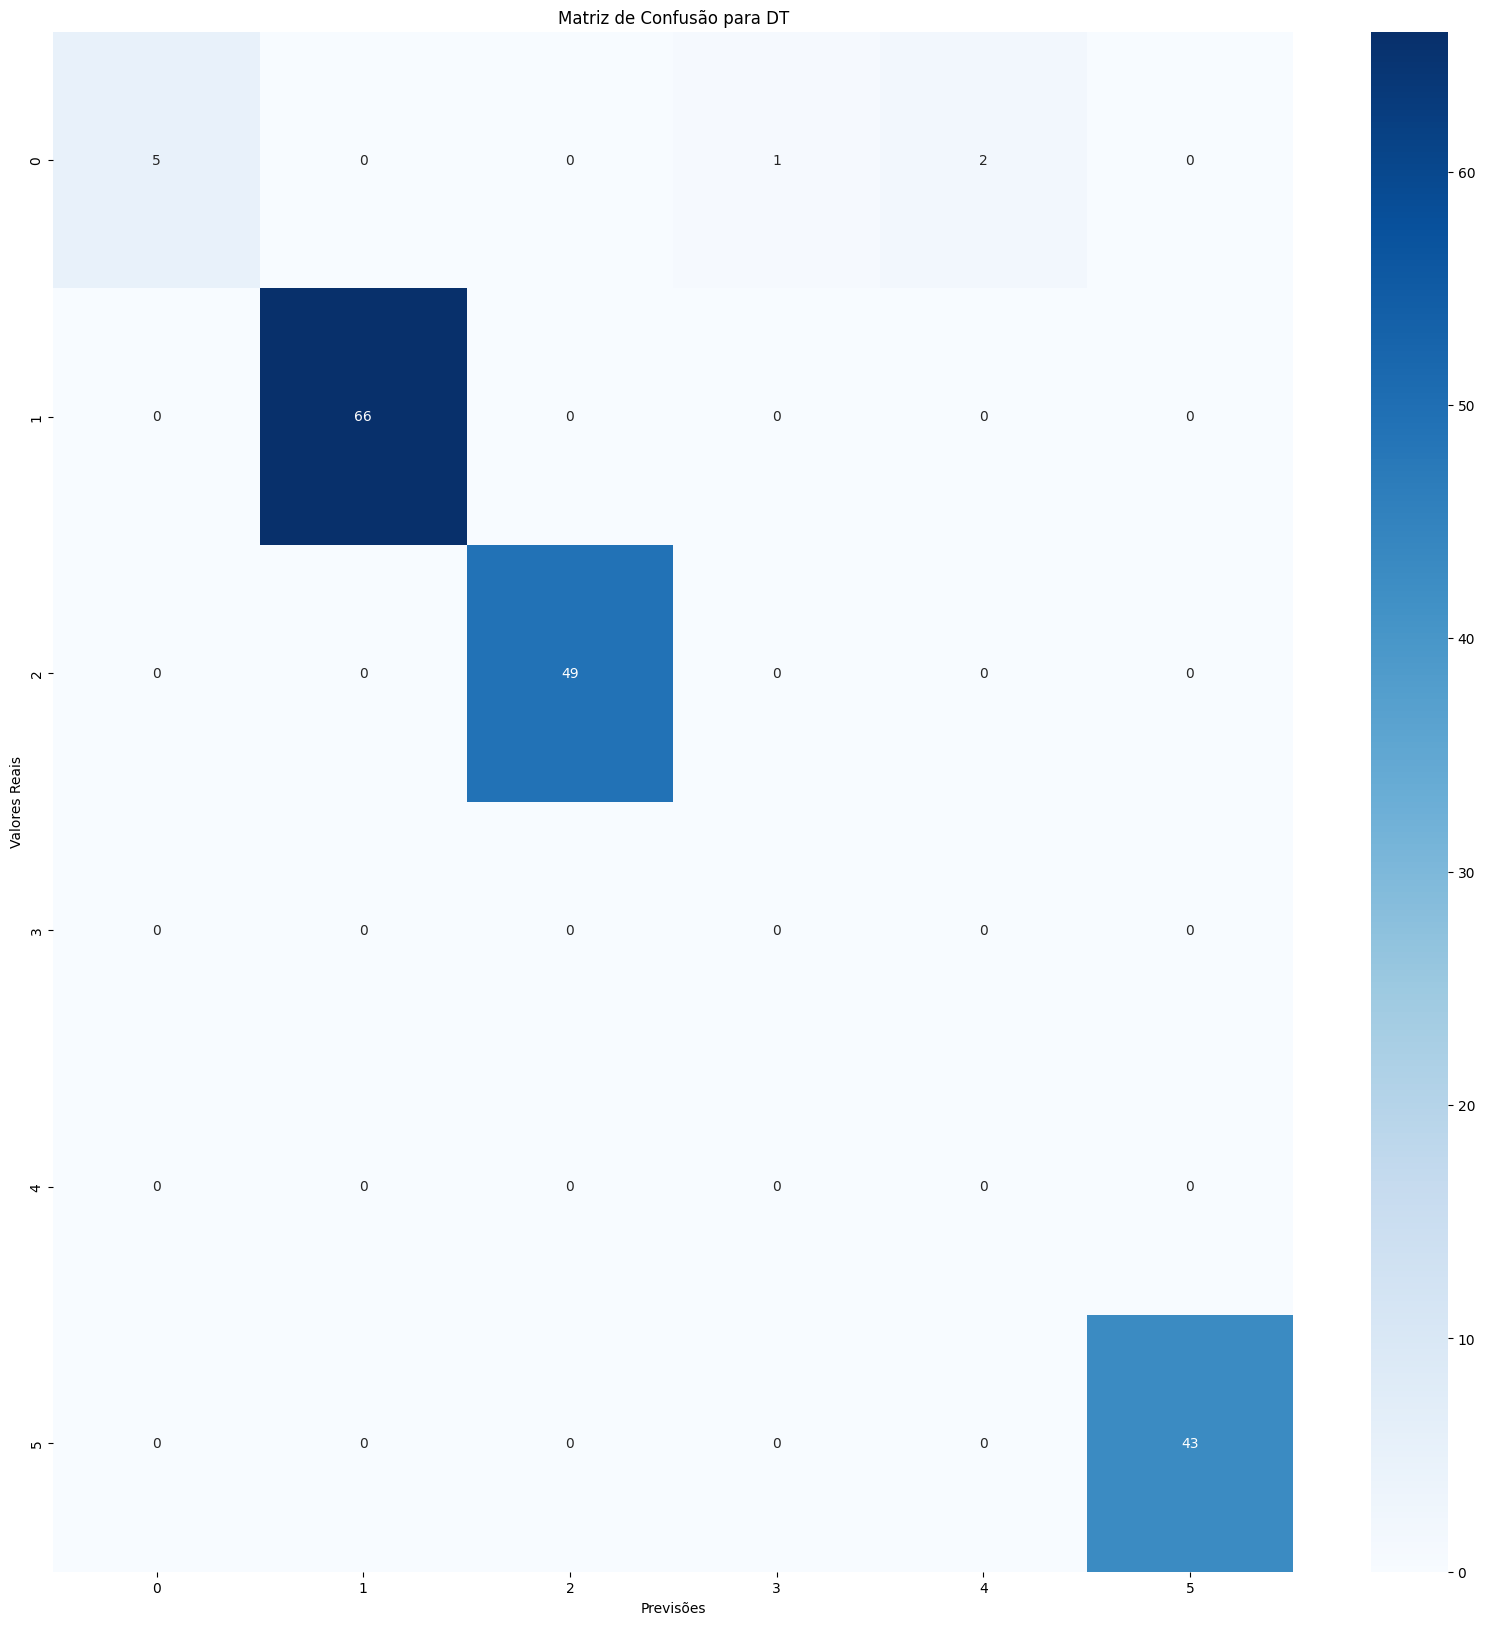

In [45]:
plt.figure(figsize=(20, 20))
sns.heatmap(matriz_confusao_DT, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão para DT')
plt.show()